In [363]:
#На языке Python разработайте скрипт, кластеризующий загруженные данные о размере площадей n квартир на определенные им
#кластеры, обозначенные определенными в программе лингвистическими метками. 
#Максимальное количество меток задать самостоятельно. 

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [434]:
train = pd.read_csv('apartments_train.csv')
test = pd.read_csv('apartments_test.csv')

In [435]:
train_labels = train['rooms'].values
train_labels_data = train.drop(['price','distance_to_city_center','rooms'],axis=1).values
test_labels_data = test[['Size(sqf)']].values/20
print(train_labels.shape, train_labels_data.shape, test_labels_data.shape)

(76,) (76, 1) (5891, 1)


In [451]:
maxminsize = train[['size','rooms']].groupby('rooms').agg({'size': ['mean','min', 'max']})
print(maxminsize)

            size               
            mean    min     max
rooms                          
1.0    26.600000  19.35   34.18
2.0    34.572727  13.08   41.94
3.0    49.577895  29.00   55.10
4.0    71.313636  67.35   75.92
5.0    93.238750  83.00  106.96


In [437]:
train_labels_data_split, val_labels_data_split, train_labels_split, val_labels_split = train_test_split(train_labels_data, train_labels, test_size=0.4, random_state=42)

In [438]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(train_labels_data_split)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [439]:
kmeans_pred = kmeans.predict(train_labels_data_split)

In [440]:
kmeans_test_pred = kmeans.predict(test_labels_data)

In [442]:
print(sorted(kmeans.cluster_centers_))

[array([25.84818182]), array([35.32333333]), array([52.945]), array([71.88142857]), array([89.715])]


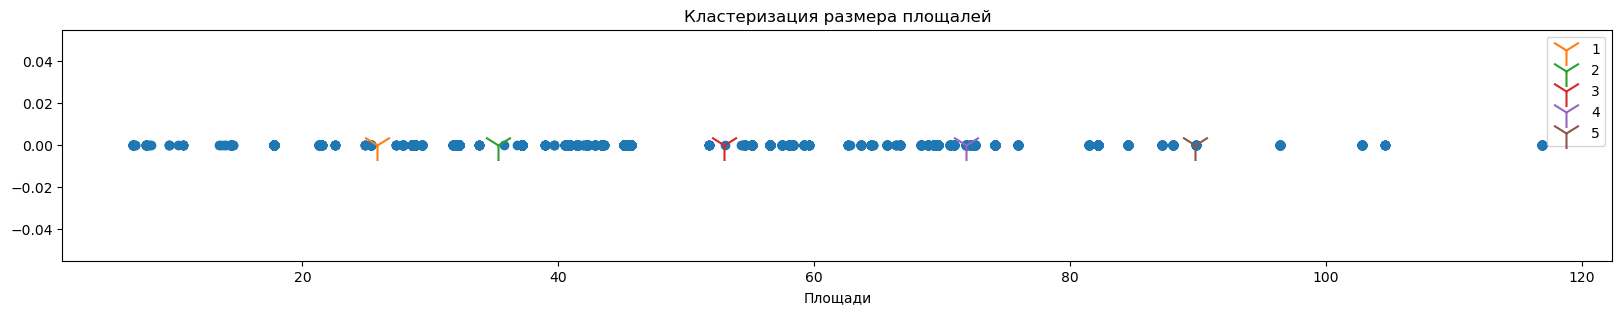

In [449]:
plt.figure(figsize=(20, 3))
plt.scatter(test_labels_data, np.zeros_like(test_labels_data))
for i, center in enumerate(sorted(kmeans.cluster_centers_)):
    plt.scatter(center, 0, s=500, marker="1", label=i+1)
plt.xlabel('Площади')
plt.title('Кластеризация размера площалей')
plt.legend()
plt.show()